In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jonathansilva2020/orange-diseases-dataset")
print("Path to dataset files:", path)

100%|██████████| 138M/138M [00:04<00:00, 30.4MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jonathansilva2020/orange-diseases-dataset/versions/3


In [3]:
import os

print(os.listdir(path = path))
print(os.listdir(path = path + "/train"))
print(os.listdir(path = path + "/test"))
train_path = path + "/train"
test_path = path + "/test"

['test', 'train']
['blackspot', 'canker', 'fresh', 'grenning']
['blackspot', 'canker', 'fresh', 'grenning']


In [4]:
# train 경로에 있는 폴더 내의 이미지 파일 불러오기
categories = os.listdir(path = path + "/train")

# Create a dictionary to hold the path to one image from each category
image_paths = {}

def get_image_from_path(dataset_dir, category):
  for category in categories:
      category_dir = os.path.join(dataset_dir, category)
      # List all files in the category directory
      files = os.listdir(category_dir)
      # Select the first image file (assuming there is at least one image in each category)
      if files:
          image_paths[category] = os.path.join(category_dir, files[0])
  return image_paths

image_paths = get_image_from_path(train_path, categories)

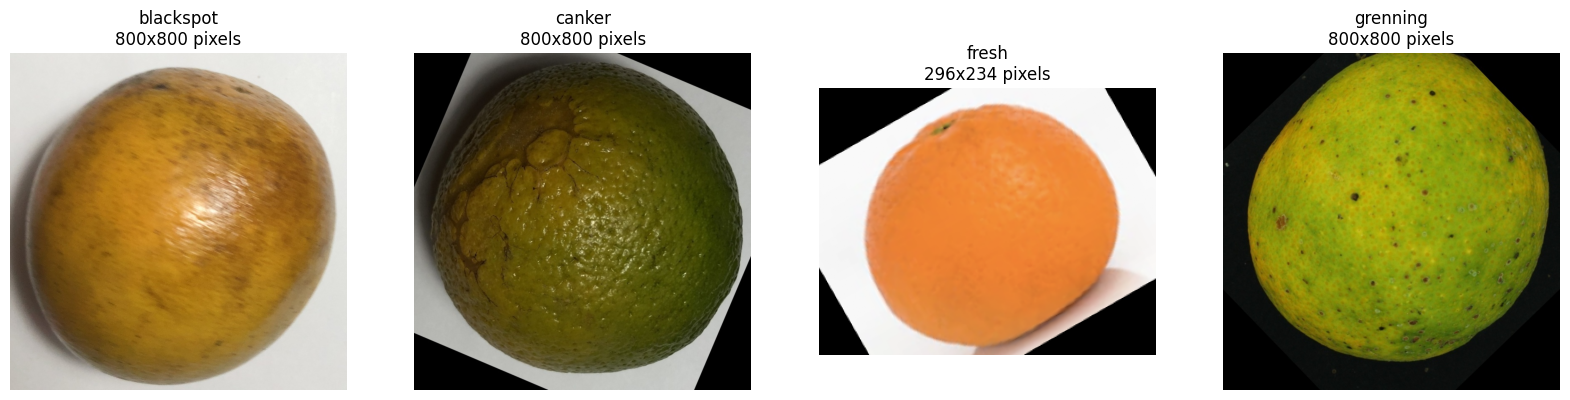

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_images(image_paths):
  # Set up the plot
  fig, axes = plt.subplots(1, 4, figsize=(20, 5))

  # Loop through each category and display the image
  for ax, (category, image_path) in zip(axes, image_paths.items()):
      # Load the image
      image = mpimg.imread(image_path)
      # Get image dimensions
      height, width, _ = image.shape
      # Display the image
      ax.imshow(image)
      ax.set_title(f'{category}\n{width}x{height} pixels')
      ax.axis('off')  # Turn off the axis

  # Show the plot
  plt.show()

show_images(image_paths)

In [22]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torchvision import datasets, transforms

class CustomImageFolder(datasets.ImageFolder):
    def __getitem__(self, index):
        path, target = self.samples[index]
        if not (path.endswith(".jpg") or path.endswith(".png")):
            return None
        sample = self.loader(path)
        if self.transform is not None:
            sample = self.transform(sample)
        return sample, target

In [74]:
model_s = models.efficientnet_v2_s(weights = models.EfficientNet_V2_S_Weights.IMAGENET1K_V1)
model_m = models.efficientnet_v2_m(weights = models.EfficientNet_V2_M_Weights.IMAGENET1K_V1)
model_l = models.efficientnet_v2_l(weights = models.EfficientNet_V2_L_Weights.IMAGENET1K_V1)



In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_s.parameters(), lr=0.0001)

In [76]:
model_s_weights = models.EfficientNet_V2_S_Weights.IMAGENET1K_V1
model_m_weights = models.EfficientNet_V2_M_Weights.IMAGENET1K_V1
model_l_weights = models.EfficientNet_V2_L_Weights.IMAGENET1K_V1

print(model_s_weights.transforms())
print(model_m_weights.transforms())
print(model_l_weights.transforms())

train_dir = "/root/.cache/kagglehub/datasets/jonathansilva2020/orange-diseases-dataset/versions/3/train"
test_dir = "/root/.cache/kagglehub/datasets/jonathansilva2020/orange-diseases-dataset/versions/3/test"

train_dataset_model_s = CustomImageFolder(train_path, transform=model_s_weights.transforms())
train_dataset_model_m = CustomImageFolder(train_path, transform=model_m_weights.transforms())
train_dataset_model_l = CustomImageFolder(train_path, transform=model_l_weights.transforms())

test_dataset_model_s = CustomImageFolder(test_path, transform=model_s_weights.transforms())
test_dataset_model_m = CustomImageFolder(test_path, transform=model_m_weights.transforms())
test_dataset_model_l = CustomImageFolder(test_path, transform=model_l_weights.transforms())

model_s = models.efficientnet_v2_s(weights = models.EfficientNet_V2_S_Weights.IMAGENET1K_V1)
model_m = models.efficientnet_v2_m(weights = models.EfficientNet_V2_M_Weights.IMAGENET1K_V1)
model_l = models.efficientnet_v2_l(weights = models.EfficientNet_V2_L_Weights.IMAGENET1K_V1)

from torch.utils.data import random_split

# 모델별 weights와 datasets을 dict로 정리
model_weights = {
    "s": model_s_weights,
    "m": model_m_weights,
    "l": model_l_weights
}

train_datasets = {
    "s": train_dataset_model_s,
    "m": train_dataset_model_m,
    "l": train_dataset_model_l
}

# 결과 저장용 dict
train_loaders = {}
val_loaders = {}

# 공통 설정
val_ratio = 0.2
batch_size = 32
seed = 42

for key in ["s", "m", "l"]:
    dataset = train_datasets[key]
    weight = model_weights[key]

    val_size = int(len(dataset) * val_ratio)
    train_size = len(dataset) - val_size

    train_subset, val_subset = random_split(dataset, [train_size, val_size], generator=torch.Generator().manual_seed(seed))

    # transform 다시 지정
    train_subset.dataset.transform = weight.transforms()
    val_subset.dataset.transform = weight.transforms()

    # DataLoader 만들기
    train_loaders[key] = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loaders[key] = DataLoader(val_subset, batch_size=batch_size, shuffle=False)


ImageClassification(
    crop_size=[384]
    resize_size=[384]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)
ImageClassification(
    crop_size=[480]
    resize_size=[480]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)
ImageClassification(
    crop_size=[480]
    resize_size=[480]
    mean=[0.5, 0.5, 0.5]
    std=[0.5, 0.5, 0.5]
    interpolation=InterpolationMode.BICUBIC
)


In [77]:
from torch.utils.data import random_split

# 모델별 weights와 datasets을 dict로 정리
model_weights = {
    "s": model_s_weights,
    "m": model_m_weights,
    "l": model_l_weights
}

train_datasets = {
    "s": train_dataset_model_s,
    "m": train_dataset_model_m,
    "l": train_dataset_model_l
}

# 결과 저장용 dict
train_loaders = {}
val_loaders = {}

# 공통 설정
val_ratio = 0.2
batch_size = 32
seed = 42

for key in ["s", "m", "l"]:
    dataset = train_datasets[key]
    weight = model_weights[key]

    val_size = int(len(dataset) * val_ratio)
    train_size = len(dataset) - val_size

    train_subset, val_subset = random_split(dataset, [train_size, val_size], generator=torch.Generator().manual_seed(seed))

    # transform 다시 지정
    train_subset.dataset.transform = weight.transforms()
    val_subset.dataset.transform = weight.transforms()

    # DataLoader 만들기
    train_loaders[key] = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loaders[key] = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

test_dataset_model_s = CustomImageFolder(test_path, transform=model_s_weights.transforms())
test_dataset_model_m = CustomImageFolder(test_path, transform=model_m_weights.transforms())
test_dataset_model_l = CustomImageFolder(test_path, transform=model_l_weights.transforms())

test_loader_model_s = DataLoader(test_dataset_model_s, batch_size= 32)
test_loader_model_m = DataLoader(test_dataset_model_m, batch_size= 32)
test_loader_model_l = DataLoader(test_dataset_model_l, batch_size= 32)

model_s.classifier[-1] = nn.Linear(1280, len(train_dataset_model_s.classes))
model_m.classifier[-1] = nn.Linear(1280, len(train_dataset_model_m.classes))
model_l.classifier[-1] = nn.Linear(1280, len(train_dataset_model_l.classes))

In [113]:
def train_model(model, train_loader, val_loader, optimizer, criterion, device, num_epochs=10, model_name="", num_classes=None):
    model.to(device)

    # 로그 저장용 리스트
    train_loss_list = []
    val_loss_list = []
    train_acc_list = []
    val_acc_list = []
    val_f1_list = []

    f1_metric = F1Score(task="multiclass", num_classes=num_classes, average="macro").to(device)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in tqdm(train_loader, desc=f"[{model_name}] Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_acc = correct / total
        avg_train_loss = running_loss / len(train_loader)

        # === 검증 ===
        model.eval()
        val_correct = 0
        val_total = 0
        val_loss_total = 0.0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss_total += loss.item()
                preds = torch.argmax(outputs, dim=1)
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)

                all_preds.append(preds)
                all_labels.append(labels)

        val_acc = val_correct / val_total
        avg_val_loss = val_loss_total / len(val_loader)

        all_preds = torch.cat(all_preds)
        all_labels = torch.cat(all_labels)
        val_f1 = f1_metric(all_preds, all_labels).item()


        # 리스트에 저장
        train_loss_list.append(avg_train_loss)
        val_loss_list.append(avg_val_loss)
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)
        val_f1_list.append(val_f1)

        print(f"[{model_name}] Epoch {epoch+1} | "
              f"Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc*100:.2f}% | "
              f"Val Loss: {avg_val_loss:.4f} | Val Acc: {val_acc*100:.2f}% | F1: {val_f1:.4f}\n")

    # === 최종 시각화 ===
    epochs = range(1, num_epochs + 1)

    plt.figure(figsize=(16, 5))

    # Loss
    plt.subplot(1, 3, 1)
    plt.plot(epochs, train_loss_list, label='Train Loss')
    plt.plot(epochs, val_loss_list, label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Accuracy
    plt.subplot(1, 3, 2)
    plt.plot(epochs, train_acc_list, label='Train Acc')
    plt.plot(epochs, val_acc_list, label='Val Acc')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # F1 Score
    plt.subplot(1, 3, 3)
    plt.plot(epochs, val_f1_list, label='Val F1 Score', color='green')
    plt.title(f'{model_name} F1 Score')
    plt.xlabel("Epoch")
    plt.ylabel("F1 Score")
    plt.legend()

    plt.tight_layout()
    plt.show()

In [120]:
def plot_confusion_matrix(preds, labels, class_names, normalize=False):
    cm = confusion_matrix(labels.cpu(), preds.cpu(), normalize='true' if normalize else None)
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d", 
                cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix')
    plt.tight_layout()
    return fig

def evaluate_model(model, dataloader, num_classes, device, class_names=None, model_name=""):
    model.eval()
    accuracy = Accuracy(task="multiclass", num_classes=num_classes).to(device)
    f1 = F1Score(task="multiclass", num_classes=num_classes, average="macro").to(device)

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc=f"Evaluating {model_name}"):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            all_preds.append(preds)
            all_labels.append(labels)

    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)

    acc_value = accuracy(all_preds, all_labels).item()
    f1_value = f1(all_preds, all_labels).item()

    print(f"[{model_name}] Test Accuracy: {acc_value * 100:.2f}% | F1 Score: {f1_value:.4f}")

    # ✅ Confusion Matrix 시각화
    if class_names is not None:
        fig = plot_confusion_matrix(all_preds, all_labels, class_names, normalize=True)
        plt.show()

    return acc_value, f1_value


In [121]:
NUM_CLASSES = len(train_dataset_model_s.classes)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model_s = model_s.to(device)
model_m = model_m.to(device)
model_l = model_l.to(device)

class_names = train_dataset_model_s.classes  # ImageFolder 기반이면 클래스 순서 자동 포함




acc_s, f1_s = evaluate_model(model = model_s, dataloader=test_loader_model_s, num_classes=NUM_CLASSES, device=device, model_name="EfficientNetV2-S")
acc_m, f1_m = evaluate_model(model_m, test_loader_model_m, NUM_CLASSES, device, model_name = "EfficientNetV2-M")
acc_l, f1_l = evaluate_model(model_l, test_loader_model_l, NUM_CLASSES, device, model_name = "EfficientNetV2-L")

Evaluating EfficientNetV2-S: 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]


[EfficientNetV2-S] Test Accuracy: 97.98% | F1 Score: 0.9772


Evaluating EfficientNetV2-M: 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]


[EfficientNetV2-M] Test Accuracy: 30.30% | F1 Score: 0.1343


Evaluating EfficientNetV2-L: 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

[EfficientNetV2-L] Test Accuracy: 36.36% | F1 Score: 0.2348


In [ ]:
EPOCHS = 10
criterion = torch.nn.CrossEntropyLoss()
optimizer_s = torch.optim.Adam(model_s.parameters(), lr=1e-4)



train_model(
    model=model_s,
    train_loader=train_loaders["s"],
    val_loader=val_loaders["s"],
    optimizer=optimizer,
    criterion=criterion,
    device=device,
    num_epochs=10,
    model_name="EfficientNetV2-S",
    num_classes=NUM_CLASSES
)

[EfficientNetV2-S] Epoch 1/10: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s]


[EfficientNetV2-S] Epoch 1 | Train Loss: 0.0023 | Train Acc: 100.00% | Val Loss: 0.0566 | Val Acc: 98.48% | F1: 0.9815



[EfficientNetV2-S] Epoch 2/10: 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]


[EfficientNetV2-S] Epoch 2 | Train Loss: 0.0039 | Train Acc: 100.00% | Val Loss: 0.0523 | Val Acc: 98.48% | F1: 0.9815



[EfficientNetV2-S] Epoch 3/10: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s]


[EfficientNetV2-S] Epoch 3 | Train Loss: 0.0083 | Train Acc: 99.75% | Val Loss: 0.0578 | Val Acc: 98.48% | F1: 0.9815



[EfficientNetV2-S] Epoch 4/10: 100%|██████████| 25/25 [00:16<00:00,  1.53it/s]


[EfficientNetV2-S] Epoch 4 | Train Loss: 0.0041 | Train Acc: 100.00% | Val Loss: 0.0523 | Val Acc: 98.48% | F1: 0.9815



[EfficientNetV2-S] Epoch 5/10: 100%|██████████| 25/25 [00:16<00:00,  1.55it/s]


[EfficientNetV2-S] Epoch 5 | Train Loss: 0.0021 | Train Acc: 100.00% | Val Loss: 0.0519 | Val Acc: 98.48% | F1: 0.9815



[EfficientNetV2-S] Epoch 6/10: 100%|██████████| 25/25 [00:16<00:00,  1.55it/s]


[EfficientNetV2-S] Epoch 6 | Train Loss: 0.0065 | Train Acc: 99.87% | Val Loss: 0.0507 | Val Acc: 98.48% | F1: 0.9815



[EfficientNetV2-S] Epoch 7/10:  72%|███████▏  | 18/25 [00:11<00:04,  1.55it/s]